In [4]:
!pip install kaggle
!kaggle datasets download nelgiriyewithana/apple-quality -p /home/ubuntu/machine-learning-zoomcamp/MyMachineLearningRepo/MyMidTermProject/data --unzip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=4f0d8d4644dc9f06b53b41d09dfd68295ee9e5ac6ddd75d763bd7c8a9daacd6e
  Stored in directory: /home/ubuntu/.cache/pip/wheels/46/d2/26/84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle
Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality
License(s): other
  0%|                                                | 0.00/170k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 170k/170k [00:00<00:00, 14.1MB/s]


In [5]:

!python --version

Python 3.12.4


In [6]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [7]:
df = pd.read_csv("./data/apple_quality.csv")
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [8]:
df .columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [9]:
# change all the strings to a uniform format
df .columns = df.columns.str.lower()

In [10]:
df.columns

Index(['a_id', 'size', 'weight', 'sweetness', 'crunchiness', 'juiciness',
       'ripeness', 'acidity', 'quality'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a_id         4000 non-null   float64
 1   size         4000 non-null   float64
 2   weight       4000 non-null   float64
 3   sweetness    4000 non-null   float64
 4   crunchiness  4000 non-null   float64
 5   juiciness    4000 non-null   float64
 6   ripeness     4000 non-null   float64
 7   acidity      4001 non-null   object 
 8   quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [12]:
df.describe()

,a_id,size,weight,sweetness,crunchiness,juiciness,ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [13]:
#check for null values in the dataframe
df.isnull().sum()

a_id           1
size           1
weight         1
sweetness      1
crunchiness    1
juiciness      1
ripeness       1
acidity        0
quality        1
dtype: int64

In [14]:
df.shape

(4001, 9)

In [15]:
#since there is only columnn across rows which has null value,drop those null values
df = df.dropna()

In [16]:
df.shape

(4000, 9)

In [17]:
df.isnull().sum()

a_id           0
size           0
weight         0
sweetness      0
crunchiness    0
juiciness      0
ripeness       0
acidity        0
quality        0
dtype: int64

In [18]:
# the column 'a_id' adds no value to this feature set, hence drop it
df.drop('a_id',axis=1,inplace=True)


In [19]:
#check the columns post the above processing
df.head()

,size,weight,sweetness,crunchiness,juiciness,ripeness,acidity,quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [20]:
df.dtypes

size           float64
weight         float64
sweetness      float64
crunchiness    float64
juiciness      float64
ripeness       float64
acidity         object
quality         object
dtype: object

In [21]:
#Change the acidity object type to float and map quality of good/bad to 1/0
df['acidity'] = df['acidity'].astype('float')
quality_mapping = {
    "good":1,
    "bad":0
}
df['quality'] = df['quality'].map(quality_mapping)

In [22]:
#Check the distribtion of the target variable 'quality' to ascertain if this a balanced or imbalanced dataset
df['quality'].value_counts()

quality
1    2004
0    1996
Name: count, dtype: int64

array([[<Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'sweetness'}>],
       [<Axes: title={'center': 'crunchiness'}>,
        <Axes: title={'center': 'juiciness'}>,
        <Axes: title={'center': 'ripeness'}>],
       [<Axes: title={'center': 'acidity'}>,
        <Axes: title={'center': 'quality'}>, <Axes: >]], dtype=object)

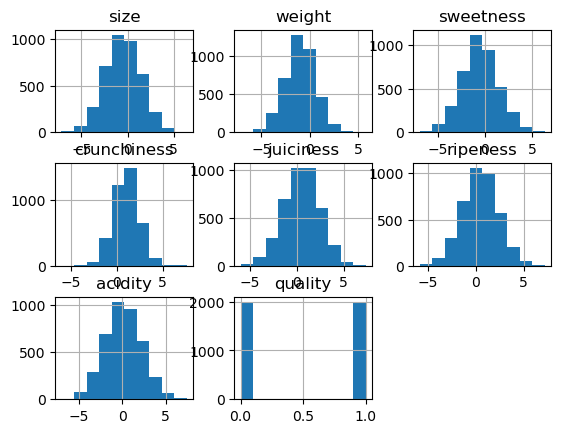

In [23]:
#visualize the distribution of the features in the dataframe
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df.hist()

In [25]:
#split the data into train/val/test with 60% and 40% distribution with random_state set to a value i.e 25 here
X = df.drop(columns=['quality'], axis=1)
y = df['quality']
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.6,random_state=25)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=25)

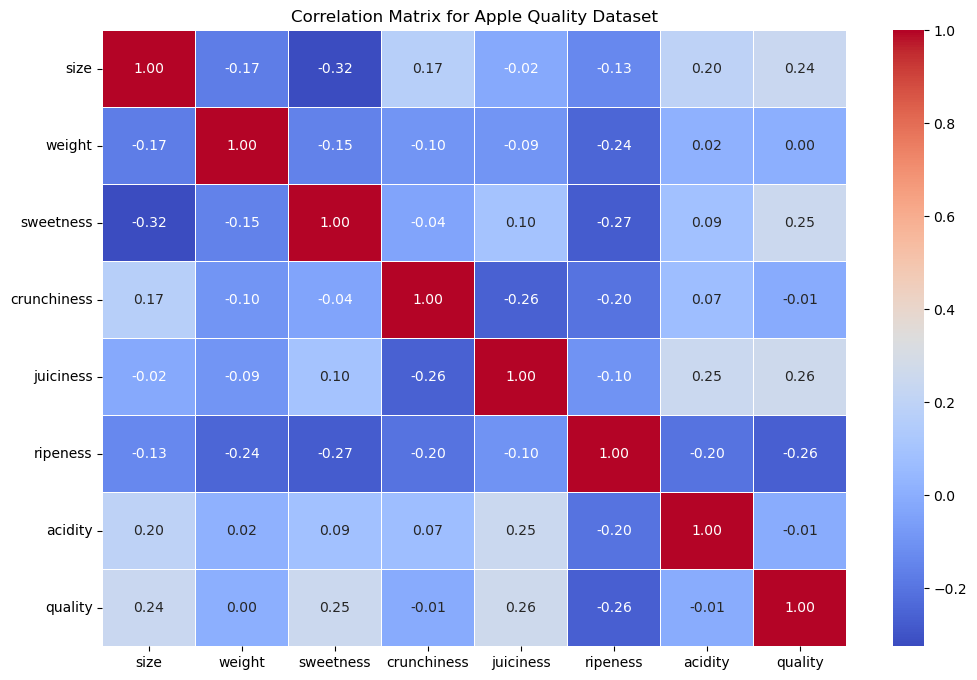

In [26]:
#plot the correlation matrix to visualize the correlation between the input features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your cleaned DataFrame
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap with Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Display the plot
plt.title("Correlation Matrix for Apple Quality Dataset")
plt.show()

C=0.01: Precision = 0.718, AUC = 0.832
C=0.01: F1 Score for validation data = 0.751
C=0.01: Precision = 0.748, AUC = 0.822
C=0.1: Precision = 0.724, AUC = 0.832
C=0.1: F1 Score for validation data = 0.751
C=0.1: Precision = 0.745, AUC = 0.822
C=1.0: Precision = 0.724, AUC = 0.832
C=1.0: F1 Score for validation data = 0.752
C=1.0: Precision = 0.746, AUC = 0.822
C=10: Precision = 0.724, AUC = 0.832
C=10: F1 Score for validation data = 0.752
C=10: Precision = 0.746, AUC = 0.822
C=50: Precision = 0.724, AUC = 0.832
C=50: F1 Score for validation data = 0.752
C=50: Precision = 0.746, AUC = 0.822
C=100: Precision = 0.724, AUC = 0.832
C=100: F1 Score for validation data = 0.752
C=100: Precision = 0.746, AUC = 0.822

Best C for AUC: 0.1 with AUC = 0.832
Best C for Precision: 0.1 with Precision = 0.724
Best C value based on F1 Score for validation data: 1.0 with F1 Score = 0.752

Best C for AUC: 0.01 with AUC = 0.822
Best C for Precision: 0.01 with Precision = 0.748


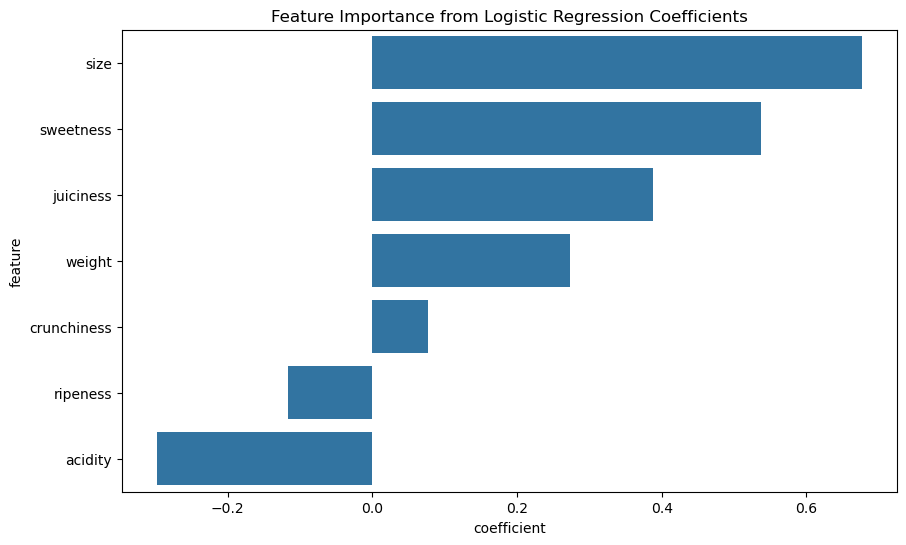

In [27]:
#Fitting a Logistic Regression on the dataset with different values of C and visualize the feature importance of input features
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, roc_auc_score
from sklearn.metrics import f1_score

C_values = [0.01,0.1,1.0, 10, 50, 100]

# Dictionaries to store results for training and test data
train_results = {}
val_results = {}
test_results = {}
f1_scores = {}

for c in C_values:
    lr = LogisticRegression(C=c,random_state=25, n_jobs=-1)
    lr.fit(X_train, y_train)

    y_train_pred_proba = lr.predict_proba(X_train)[:,1]
    y_train_pred = lr.predict(X_train)
    
    y_val_pred_proba = lr.predict_proba(X_val)[:,1]
    y_val_pred = lr.predict(X_val)
    
    y_test_pred_proba = lr.predict_proba(X_test)[:,1]
    y_test_pred = lr.predict(X_test)
    
    
    train_precision = precision_score(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train, y_train_pred_proba)
    train_results[c] = {'Precision': train_precision, 'AUC': train_auc}
    
    val_precision = precision_score(y_val, y_val_pred)
    val_auc = roc_auc_score(y_val, y_val_pred_proba)
    val_results[c] = {'Precision': val_precision, 'AUC': val_auc}
    print(f"C={c}: Precision = {val_precision:.3f}, AUC = {val_auc:.3f}")
    
    #f1 score for validation data
    f1 = f1_score(y_val, y_val_pred)
    f1_scores[c] = f1
    print(f"C={c}: F1 Score for validation data = {f1:.3f}")
    
    
    test_precision = precision_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_pred_proba)
    test_results[c] = {'Precision': test_precision, 'AUC': test_auc}
    print(f"C={c}: Precision = {test_precision:.3f}, AUC = {test_auc:.3f}")
    

# get the best values of C for validation data

best_val_C_auc = max(val_results, key=lambda x: val_results[x]['AUC'])
best_val_C_precision = max(val_results, key=lambda x: val_results[x]['Precision'])

print(f"\nBest C for AUC: {best_val_C_auc} with AUC = {val_results[best_val_C_auc]['AUC']:.3f}")
print(f"Best C for Precision: {best_val_C_precision} with Precision = {val_results[best_val_C_precision]['Precision']:.3f}")
    
best_C = max(f1_scores, key=f1_scores.get)
print(f"Best C value based on F1 Score for validation data: {best_C} with F1 Score = {f1_scores[best_C]:.3f}")    

# get the best values of C for test data


best_test_C_auc = max(test_results, key=lambda x: test_results[x]['AUC'])
best_test_C_precision = max(test_results, key=lambda x: test_results[x]['Precision'])

print(f"\nBest C for AUC: {best_test_C_auc} with AUC = {test_results[best_test_C_auc]['AUC']:.3f}")
print(f"Best C for Precision: {best_test_C_precision} with Precision = {test_results[best_test_C_precision]['Precision']:.3f}")


coefficients = lr.coef_[0]

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': coefficients
}).sort_values(by='coefficient', ascending=False)

# Plot feature coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='feature', data=coef_df)
plt.title("Feature Importance from Logistic Regression Coefficients")
plt.show()

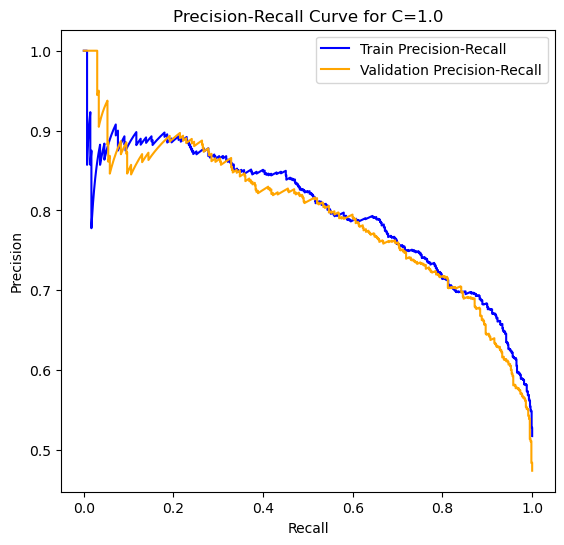

In [28]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Precision-Recall curve
train_precision, train_recall, _ = precision_recall_curve(y_train, y_train_pred_proba)
val_precision, val_recall, _ = precision_recall_curve(y_val, y_val_pred_proba)

# AUC-ROC curve
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_pred_proba)
val_fpr, val_tpr, _ = roc_curve(y_val, y_val_pred_proba)

train_auc = auc(train_fpr, train_tpr)
val_auc = auc(val_fpr, val_tpr)

# Plot Precision-Recall curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(train_recall, train_precision, label="Train Precision-Recall", color="blue")
plt.plot(val_recall, val_precision, label="Validation Precision-Recall", color="orange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for C=1.0")
plt.legend()

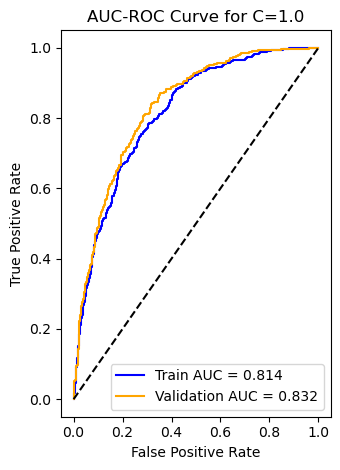

In [29]:
# Plot AUC-ROC curve
plt.subplot(1, 2, 2)
plt.plot(train_fpr, train_tpr, label=f"Train AUC = {train_auc:.3f}", color="blue")
plt.plot(val_fpr, val_tpr, label=f"Validation AUC = {val_auc:.3f}", color="orange")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for C=1.0")
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
#hyperparameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1.0, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

# Define the logistic regression model
log_reg = LogisticRegression(random_state=25, max_iter=500)

# Define GridSearchCV
grid_search = GridSearchCV(
    log_reg,
    param_grid,
    #scoring=make_scorer(roc_auc_score, needs_proba=True),
    scoring=make_scorer(f1_score),
    cv=5,  # 5-fold cross-validation
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
#print("Best AUC Score:", grid_search.best_score_)
print("Best F1-score:", grid_search.best_score_)



Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1-score: 0.7551639221437811


In [32]:
# try scaling the features and see if that improves the model .Store the output in a pickle file.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, f1_score
import pickle

# Load the data
df = pd.read_csv("./data/apple_quality.csv")

# Drop unnecessary columns
df .columns = df.columns.str.lower()
df = df.dropna()

df.drop('a_id',axis=1,inplace=True)
#df.columns
df['acidity'] = df['acidity'].astype('float')


quality_mapping = {
    "good":1,
    "bad":0
}
df['quality'] = df['quality'].map(quality_mapping)

# Define features and target variable
X = df.drop(columns=['quality'])
y = df['quality']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

# Set up feature engineering pipeline
num_features = X.columns  # Assuming all features are numerical except for 'a_id'
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False))
    ])



# Fit the train data and transform the valiation and test data
X_train_transformed = final_pipeline.fit_transform(X_train)
X_val_transformed = final_pipeline.transform(X_val)
X_test_transformed = final_pipeline.transform(X_test)
#X_val_transformed = final_pipeline.named_steps['scaler'].transform(X_val)
#X_test_transformed = final_pipeline.named_steps['scaler'].transform(X_test)

# Train logistic regression model on the transformed data
log_reg = LogisticRegression(C=0.01,max_iter=1000,penalty='l2',solver='lbfgs')
log_reg.fit(X_train_transformed, y_train)

# Perform cross-validation on the training set
#scorer = make_scorer(f1_score)  # Use F1-score as the evaluation metric
#cv_scores = cross_val_score(final_pipeline, X_train_transformed, y_train, cv=5, scoring=scorer, n_jobs=-1)

# Evaluate on validation set
y_val_pred = log_reg.predict(X_val_transformed)
y_val_pred_proba = log_reg.predict_proba(X_val_transformed)[:, 1]

# Evaluate on test set
y_test_pred = log_reg.predict(X_test_transformed)
y_test_pred_proba = log_reg.predict_proba(X_test_transformed)[:, 1]

# Cross-validation results
#print("Cross-Validation F1 Scores:", cv_scores)
#print("Mean Cross-Validation F1 Score:", np.mean(cv_scores))

# Print evaluation metrics for validation data
print("\nValidation Results:")
print("Validation F1 Score:", f1_score(y_val, y_val_pred))
print("Validation AUC-ROC:", roc_auc_score(y_val, y_val_pred_proba))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Print evaluation metrics for test data
print("\nTest Results:")
print("Validation F1 Score:", f1_score(y_test, y_test_pred))
print("Validation AUC-ROC:", roc_auc_score(y_test, y_test_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

#pickle the model with the best F1-Score and AUC-ROC score

# Define the pipeline with scaling and polynomial features
#final_pipeline = Pipeline([
#    ('scaler', StandardScaler()),
#    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
#    ('log_reg', LogisticRegression((c=0.01,max_iter=1000,penalty='l2',solver='lbfgs'))
#])

# Train the pipeline on the entire training dataset
#final_pipeline.fit(X_train_transformed, y_train)

# Save the pipeline (model + preprocessing) using pickle
with open('lr_apple_quality_model.pkl', 'wb') as file:
    pickle.dump(final_pipeline, file)

print("The best model has been saved to 'lr_apple_quality_model.pkl'")


Validation Results:
Validation F1 Score: 0.8649350649350649
Validation AUC-ROC: 0.9504152448815736
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       424
           1       0.85      0.89      0.86       376

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800


Test Results:
Validation F1 Score: 0.8709288299155609
Validation AUC-ROC: 0.9368795478982772
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       394
           1       0.85      0.89      0.87       406

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800

The best model has been saved to 'lr_apple_quality_model.pkl'


/tmp/ipykernel_2534/838878650.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, bins=15)
/tmp/ipykernel_2534/838878650.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, bins=15)
/tmp/ipykernel_2534/838878650.py:8: UserWarning: 

`distplot` is a dep

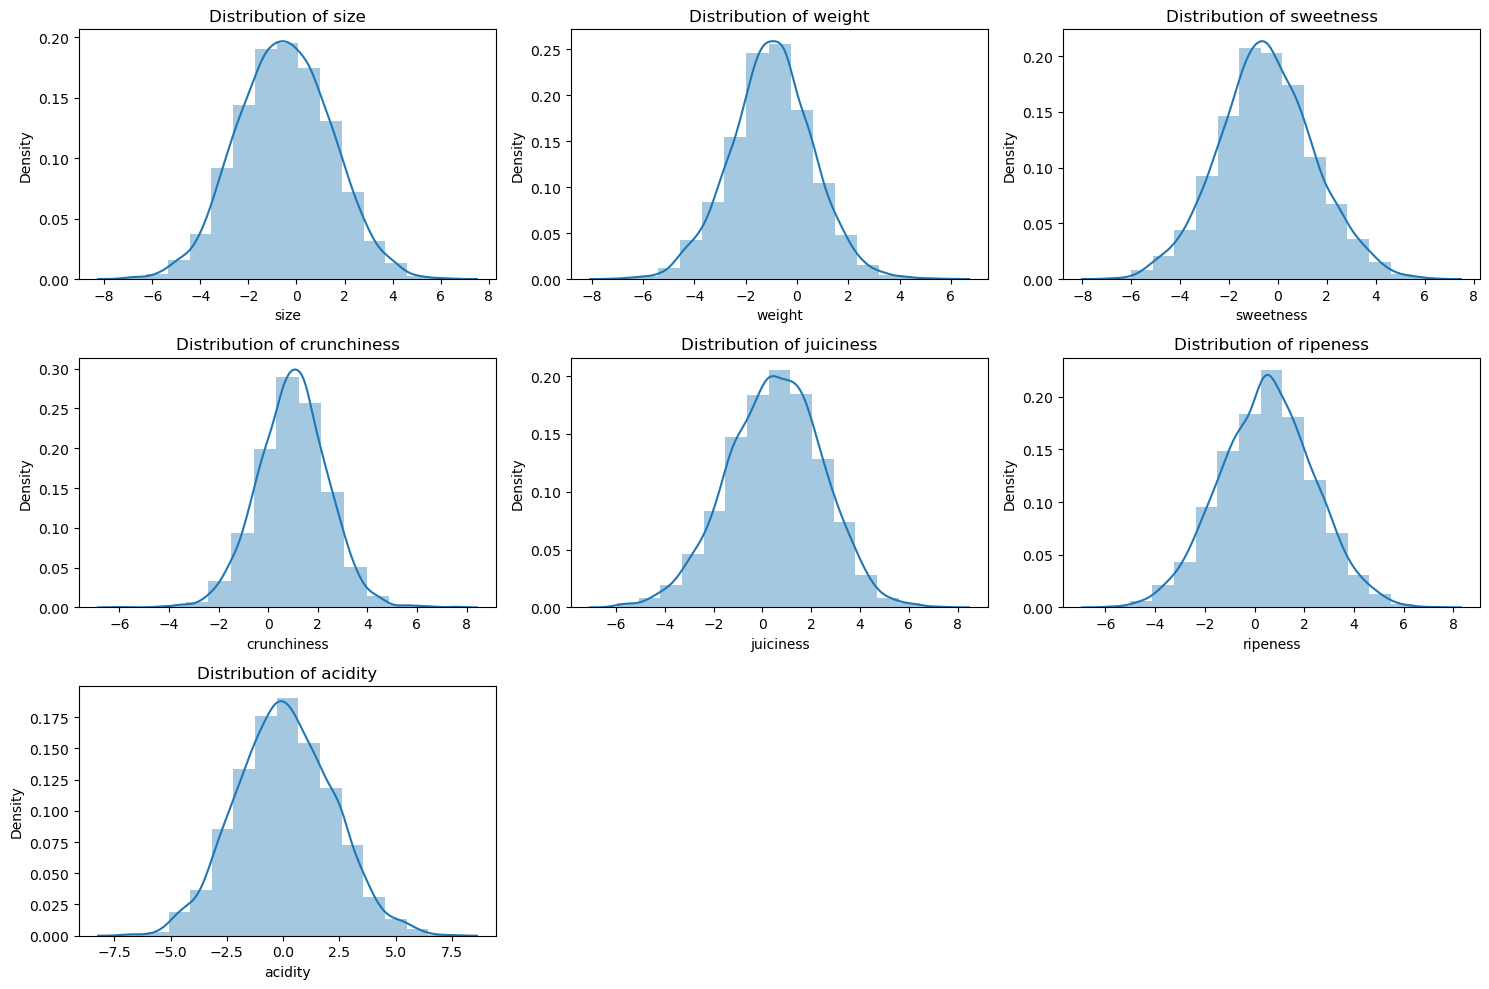

In [33]:
#visualize the parameters post scaling
import seaborn as sns
#column distribution
# Set up the plot grid
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude 'quality' for distribution
    plt.subplot(3, 3, i)  # Adjust grid based on the number of features
    sns.distplot(df[column], kde=True, bins=15)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [36]:
#use xgboost to see if its better than linear regression model
!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, f1_score, make_scorer
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Load the data
df = pd.read_csv("./data/apple_quality.csv")

# Preprocessing
df.columns = df.columns.str.lower()
df = df.dropna()
df.drop('a_id', axis=1, inplace=True)
df['acidity'] = df['acidity'].astype('float')

quality_mapping = {"good": 1, "bad": 0}
df['quality'] = df['quality'].map(quality_mapping)

# Define features and target variable
X = df.drop(columns=['quality'])
y = df['quality']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

# Set up XGBoost with a pipeline
xgboost_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('xgb', XGBClassifier(
        random_state=1,
        use_label_encoder=False,
        eval_metric='logloss'  # Avoids a warning
    ))
])

# Perform cross-validation on the training set
scorer = make_scorer(f1_score)  # Use F1-score as the evaluation metric
cv_scores = cross_val_score(xgboost_pipeline, X_train, y_train, cv=5, scoring=scorer, n_jobs=-1)

print(f"Cross-Validation F1-Scores: {cv_scores}")
print(f"Mean Cross-Validation F1-Score: {np.mean(cv_scores):.3f}")

# Train the model and evaluate on validation and test sets
xgboost_pipeline.fit(X_train, y_train)

# Validation Evaluation
y_val_pred = xgboost_pipeline.predict(X_val)
y_val_pred_proba = xgboost_pipeline.predict_proba(X_val)[:, 1]
print("\nValidation Results:")
print("F1-Score:", f1_score(y_val, y_val_pred))
print("AUC-ROC:", roc_auc_score(y_val, y_val_pred_proba))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Test Evaluation
y_test_pred = xgboost_pipeline.predict(X_test)
y_test_pred_proba = xgboost_pipeline.predict_proba(X_test)[:, 1]
print("\nTest Results:")
print("F1-Score:", f1_score(y_test, y_test_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_test_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 5, 7],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(xgboost_pipeline, param_grid, cv=5, scoring=scorer, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("\nTest Results for Best Model:")
print("F1-Score:", f1_score(y_test, y_test_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_test_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

/home/ubuntu/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:57:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ubuntu/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:57:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ubuntu/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:57:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ubuntu/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:57:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ubuntu/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:57:53] WARNING

Cross-Validation F1-Scores: [0.86836935 0.87272727 0.88659794 0.86530612 0.88933602]
Mean Cross-Validation F1-Score: 0.876

Validation Results:
F1-Score: 0.8961038961038961
AUC-ROC: 0.9638322962665595
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       424
           1       0.88      0.92      0.90       376

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800


Test Results:
F1-Score: 0.8839506172839506
AUC-ROC: 0.9542209497136854
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       394
           1       0.89      0.88      0.88       406

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



/home/ubuntu/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:57:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ubuntu/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:57:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ubuntu/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:57:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ubuntu/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:57:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ubuntu/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:57:53] WARNING


Best Parameters from GridSearchCV:
{'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}

Test Results for Best Model:
F1-Score: 0.8956310679611651
AUC-ROC: 0.9543084694056162
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       394
           1       0.88      0.91      0.90       406

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



In [37]:
#pickle this xgboost model 
import pickle

# Save the pipeline (preprocessing + trained model) using pickle
with open('xgboost_apple_quality_model.pkl', 'wb') as file:
    pickle.dump(xgboost_pipeline, file)

print("The trained pipeline has been saved as 'xgboost_apple_quality_model.pkl'")

The trained pipeline has been saved as 'xgboost_apple_quality_model.pkl'


In [38]:
# test the pickled model before flask integration

import pickle
import numpy as np

# Load model
with open("xgboost_apple_quality_model.pkl", "rb") as f:
    model = pickle.load(f)

# Test sample input
features = np.array([-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590]).reshape(1, -1)
prediction = model.predict(features)
probability = model.predict_proba(features)

print("Prediction:", prediction[0])
print("Probabilities:", probability[0])

Prediction: 1
Probabilities: [0.01863635 0.98136365]


/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
